<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Thai_Google_AI_Studio_Gemini_with_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thai Gemini with LangChain

In [ ]:
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai


In [ ]:
!pip show langchain langchain-core langchain-google-genai

In [ ]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [ ]:
models = [m for m in genai.list_models()]
models

In [ ]:
# generate text
prompt = 'Tell me about yourself'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

In [ ]:
# generate text
prompt = 'คุณพูดภาษาไทยได้ไหม'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

In [ ]:
response = model.generate_content("""Rewrite this in English: """)

Markdown(response.text)

In [ ]:
response = model.generate_content("""ช่วยผมเขียน Python สำหรับ Hello World (ผมขี้เกียจ) """)

Markdown(response.text)

## Using Gemini Pro Vision

In [ ]:
# lets get some images
!curl -o saturn_image.jpg https://photojournal.jpl.nasa.gov/jpeg/PIA12567.jpg
!curl -o earth_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg
!curl -o neptune_image.jpg https://smd-cms.nasa.gov/wp-content/uploads/2023/09/PIA01492-1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98353  100 98353    0     0   141k      0 --:--:-- --:--:-- --:--:--  141k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  379k  100  379k    0     0  1627k      0 --:--:-- --:--:-- --:--:-- 1626k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  252k  100  252k    0     0   888k      0 --:--:-- --:--:-- --:--:--  890k


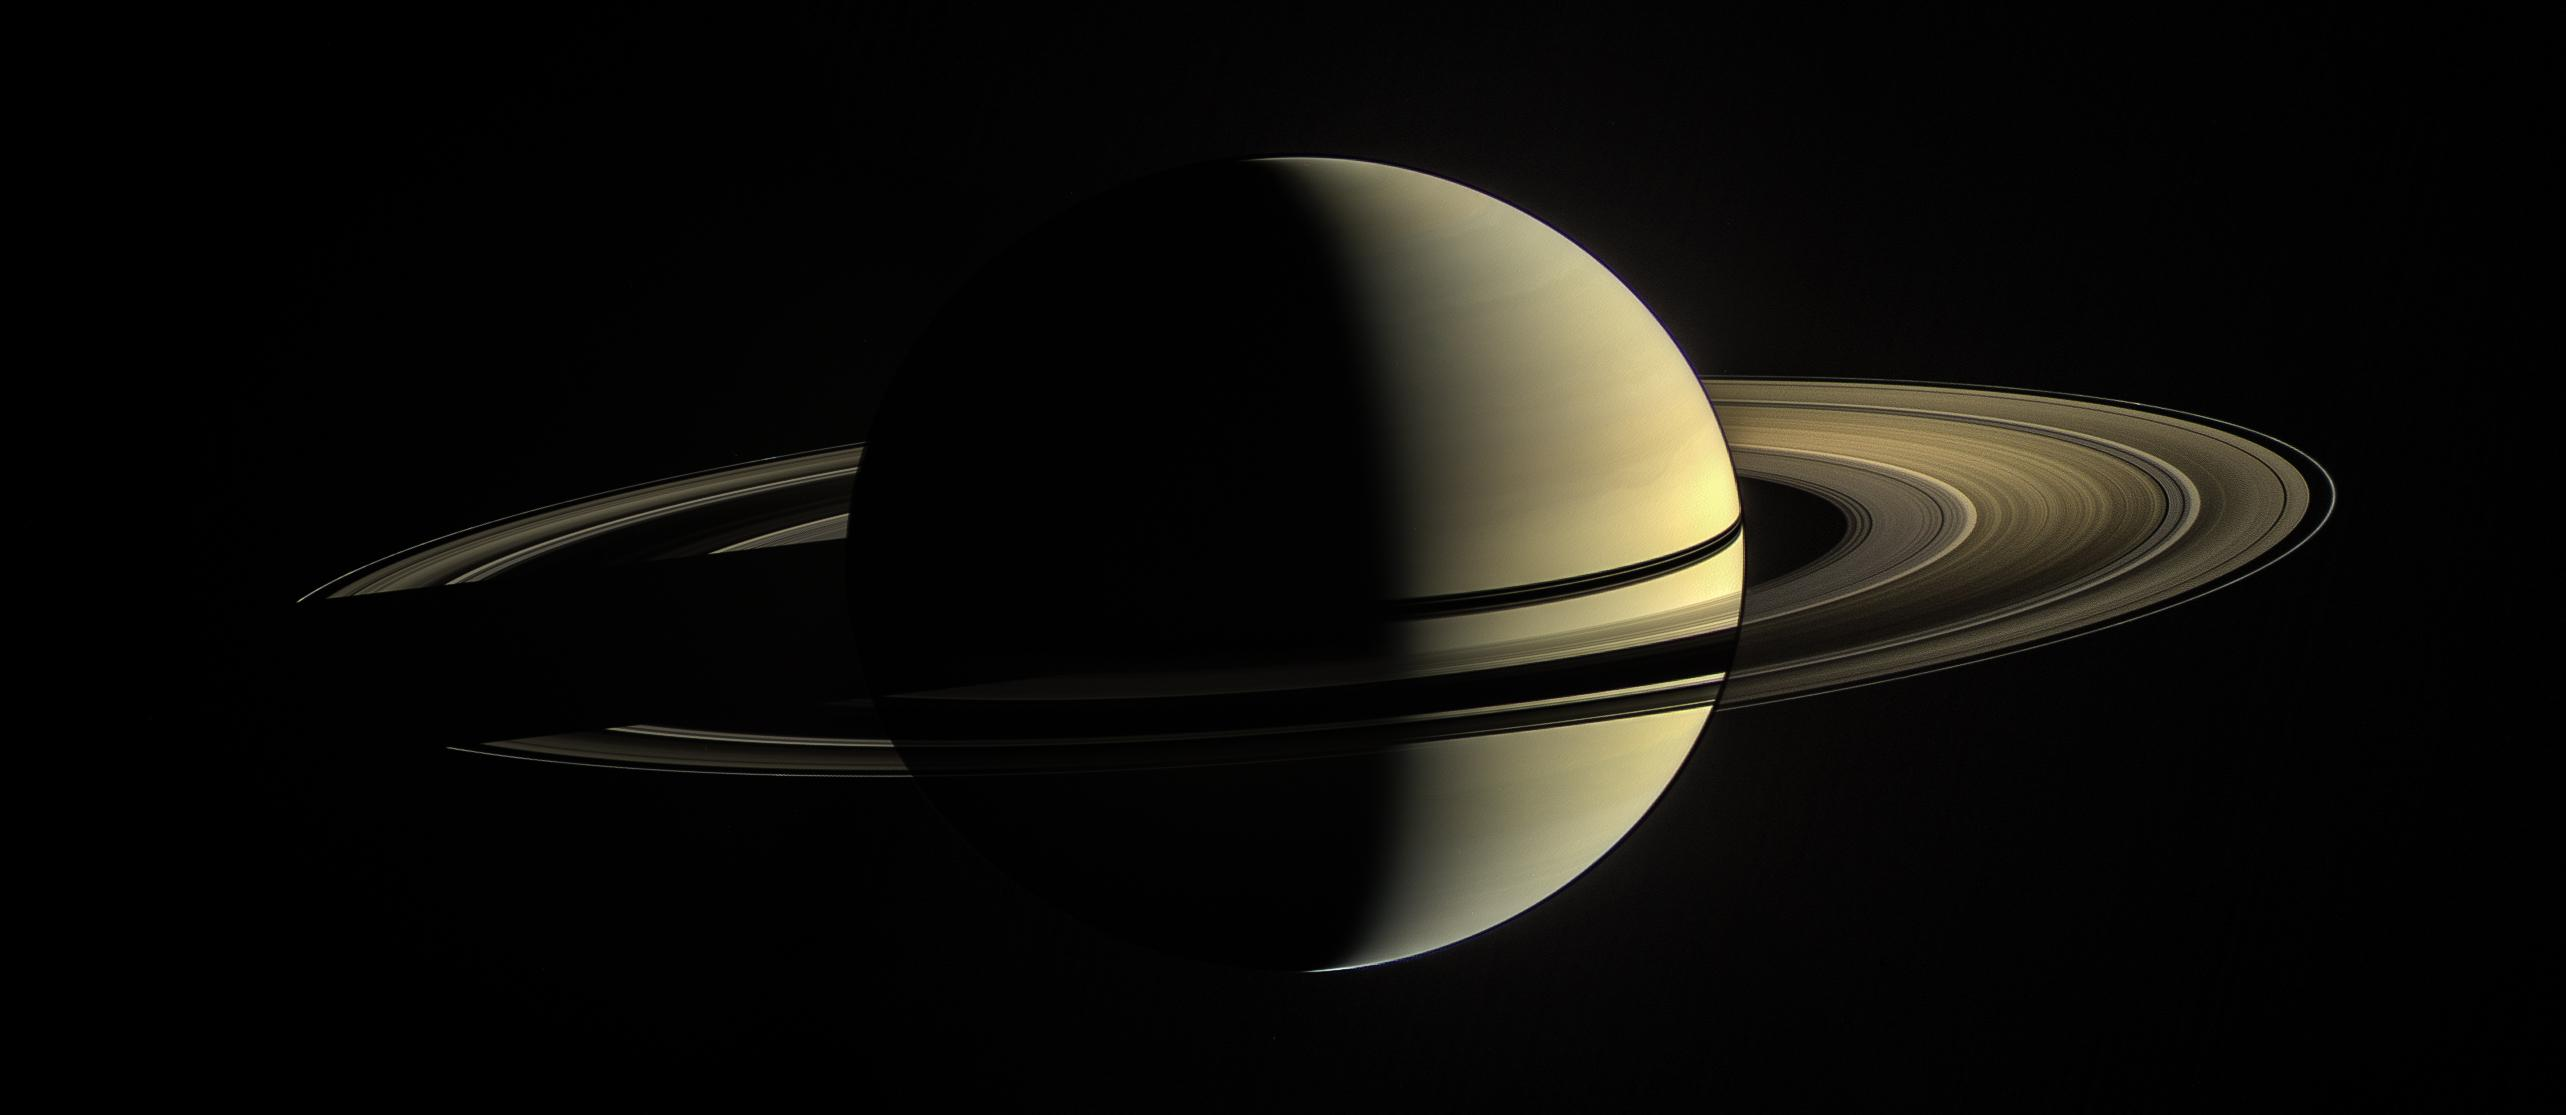

In [ ]:
import PIL.Image

img = PIL.Image.open('saturn_image.jpg')
img

In [ ]:
new_size = (200, 200)
img = img.resize(new_size)

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

Markdown(response.text)

 Saturn is the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. Saturn is a gas giant with an average radius of about 9.44 times that of Earth. It is the only planet in the Solar System that has a prominent ring system. The rings are made mostly of ice particles with a small amount of rock and dust. Saturn's atmosphere is composed mostly of hydrogen and helium, with traces of other elements. The planet's interior is probably composed of a dense core of rock and ice, surrounded by a layer of liquid metallic hydrogen and helium. Saturn has a magnetosphere that is the largest in the Solar System. The planet has 62 moons, the largest of which is Titan.

In [ ]:
response.prompt_feedback

In [ ]:
response = model.generate_content(["Give me the name of the planet and some movies that have featured this:", img], stream=True)
response.resolve()

In [ ]:
Markdown(response.text)

 The planet is Saturn.

Movies that have featured Saturn include:

* 2001: A Space Odyssey (1968)
* Saturn 3 (1980)
* The Abyss (1989)
* Event Horizon (1997)
* Armageddon (1998)
* Deep Impact (1998)
* The Core (2003)
* Sunshine (2007)
* Transformers: Revenge of the Fallen (2009)
* Interstellar (2014)
* The Martian (2015)
* Passengers (2016)
* Ad Astra (2019)

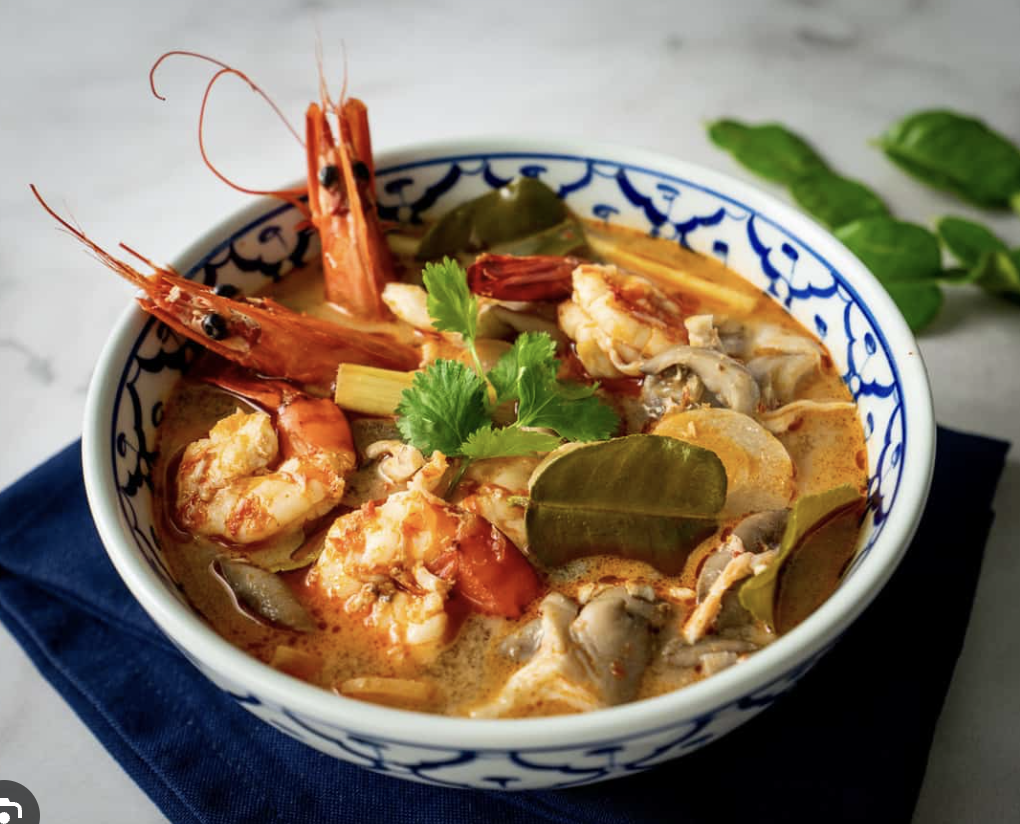

In [ ]:
img = PIL.Image.open('/content/Screenshot 2023-12-17 at 7.56.55 AM.png')
img

In [ ]:
response = model.generate_content(["What is this food and can you give me a recipie?", img], stream=True)
response.resolve()

In [ ]:
Markdown(response.text)

 This is Tom Yum Soup, a popular Thai dish. Here is a recipe:

Ingredients:

* 1 lb shrimp, peeled and deveined
* 1 can (13.5 oz) coconut milk
* 1 can (4 oz) straw mushrooms, drained
* 1 can (15 oz) bamboo shoots, drained
* 1/2 cup chopped onion
* 1/4 cup chopped green bell pepper
* 1/4 cup chopped red bell pepper
* 1 stalk lemongrass, bruised
* 2 cloves garlic, minced
* 2 tablespoons chopped fresh cilantro
* 2 tablespoons chopped fresh basil
* 1 tablespoon fish sauce
* 1 tablespoon lime juice
* 1/2 teaspoon sugar
* 1/4 teaspoon red pepper flakes
* Salt and pepper to taste

Instructions:

1. In a large pot, bring the coconut milk to a simmer over medium heat.
2. Add the straw mushrooms, bamboo shoots, onion, green bell pepper, red bell pepper, lemongrass, garlic, cilantro, basil, fish sauce, lime juice, sugar, red pepper flakes, salt, and pepper.
3. Bring to a boil, then reduce heat and simmer for 10 minutes.
4. Add the shrimp and cook until pink and opaque, about 2 minutes.
5. Serve immediately.

# **ระวัง** - Hallucinations

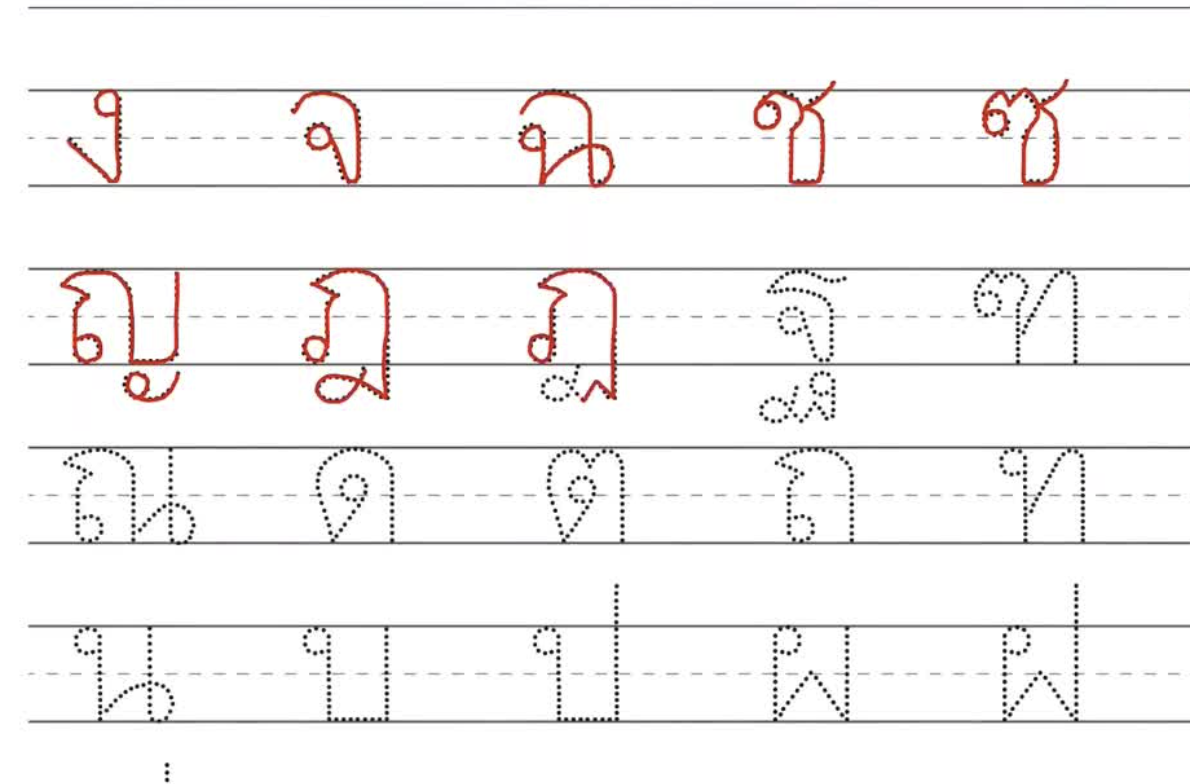

In [ ]:
img = PIL.Image.open('/content/Screenshot 2023-12-17 at 8.18.42 AM.png')
img

In [ ]:
response = model.generate_content(["Can you help me with my homework?", img], stream=True)
response.resolve()

In [ ]:
Markdown(response.text)

 The first row of letters are:
ก ข ฃ ค ฅ

The second row of letters are:
ฆ ง จ ฉ ช

The third row of letters are:
ซ ฌ ญ ฎ ฏ

The fourth row of letters are:
ฐ ฑ ฒ ณ ด

# Google's Gemini with LangChain

We can Chain together many calls to Gemini Pro to get some outputs


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-pro")


result = llm.invoke("What do most people think the best Thai food is")

Markdown(result.content)


1. **Pad Thai:** This stir-fried noodle dish is a classic Thai dish that is made with rice noodles, vegetables, and a sweet and sour sauce. It is often served with peanuts and lime wedges.
2. **Tom Yum Goon:** This spicy and sour soup is made with shrimp, lemongrass, galangal, kaffir lime leaves, and chili peppers. It is a popular dish to eat when you are feeling sick or to warm up on a cold day.
3. **Khao Pad:** This fried rice dish is made with rice, vegetables, eggs, and your choice of protein. It is a popular dish to eat for breakfast, lunch, or dinner.
4. **Gaeng Daeng:** This red curry dish is made with beef, bamboo shoots, red chili peppers, and coconut milk. It is a spicy and flavorful dish that is sure to please.
5. **Som Tum:** This green papaya salad is made with shredded green papaya, carrots, tomatoes, chilies, and peanuts. It is a popular dish to eat as a side dish or as a snack.
6. **Massaman Curry:** This mild curry dish is made with beef, potatoes, peanuts, and coconut milk. It is a popular dish to eat for dinner or as a special occasion dish.
7. **Larb:** This spicy minced meat salad is made with pork, chicken, or beef, mint, cilantro, shallots, and chilies. It is a popular dish to eat as a side dish or as a main course.
8. **Pad See Ew:** This stir-fried noodle dish is made with wide rice noodles, vegetables, and a sweet soy sauce. It is a popular dish to eat for lunch or dinner.
9. **Green Curry:** This mild curry dish is made with chicken, bamboo shoots, kaffir lime leaves, and coconut milk. It is a popular dish to eat for dinner or as a special occasion dish.
10. **Khanom Buang:** These crispy pastry shells are filled with a sweet custard and topped with shredded coconut. They are a popular dessert to eat as a snack or as a special occasion treat.

In [ ]:
result = llm.invoke("คนส่วนใหญ่คิดว่าอาหารไทยที่ดีที่สุดคืออะไร")

Markdown(result.content)

* **แกงมัสมั่น** แกงเนื้อที่ปรุงด้วยกะทิ มันฝรั่ง หัวหอม มะเขือเทศ แครอท เครื่องเทศต่างๆ และเนื้อสัตว์ตามที่คุณเลือก
* **ผัดไทย** ก๋วยเตี๋ยวผัดกับกุ้ง เนื้อสัตว์ ไข่ ซอสมะขามหวาน ถั่วงอก และถั่วลิสง
* **ต้มยำกุ้ง** ซุปร้อนและเปรี้ยวที่ทำจากกุ้ง เห็ดฟาง ตะไคร้ ใบมะกรูด น้ำมะนาว และพริก
* **ส้มตำ** สลัดเผ็ดที่ทำจากมะละกอดิบ มะเขือเทศ พริก กระเทียม น้ำมะนาว และถั่วลิสง
* **ข้าวผัด** ข้าวผัดกับเนื้อสัตว์ ไข่ ผัก และเครื่องปรุงรส
* **ก๋วยเตี๋ยวเรือ** ก๋วยเตี๋ยวน้ำซุปรสเข้มข้นที่ทำจากเนื้อสัตว์ เครื่องใน และผักต่างๆ
* **กะเพราไก่** ผัดกะเพราไก่กับพริก กระเทียม และใบกะเพรา
* **ข้าวหมูแดง** ข้าวราดหมูแดง หมูกรอบ ไข่ต้ม กุนเชียง และน้ำราด
* **สุกี้** หม้อต้มที่มีเนื้อสัตว์ ผัก และเส้นก๋วยเตี๋ยวที่ปรุงด้วยน้ำซุป
* **ไก่ย่าง** ไก่ย่างที่หมักด้วยเครื่องปรุงต่างๆ แล้วนำไปย่างจนสุกเหลืองกรอบ

In [ ]:
result = llm.invoke("คนไทยส่วนใหญ่คิดว่าอาหารไทยที่ดีที่สุดคืออะไร")

Markdown(result.content)

* **ผัดไทย** เป็นก๋วยเตี๋ยวผัดยอดนิยมที่ปรุงด้วยเส้นจันท์, ถั่วงอก, กุ้ง, ไก่หรือเต้าหู้ และไข่ ก๋วยเตี๋ยวผัดกับซอส tamarind ซึ่งให้รสเปรี้ยว หวาน และเผ็ดเล็กน้อย

* **ต้มยำกุ้ง** เป็นซุปเปรี้ยวเผ็ดปรุงด้วยน้ำซุปใส, มะนาว, ตะไคร้, ข่า, ใบมะกรูด, พริกขี้หนู และกุ้ง

* **แกงเขียวหวานไก่** เป็นแกงกะทิสีเขียวปรุงด้วยเนื้อไก่, พริกหยวกเขียว, ใบโหระพา, กะทิ, พริกแกงเขียวหวาน, และกะปิ

* **ผัดกะเพรา** เป็นอาหารจานเดียวที่ปรุงด้วยเนื้อสัตว์ (เช่น เนื้อหมู, เนื้อวัว หรือไก่), พริก, กระเทียม, กะเพรา, และซอสปรุงรส

* **ข้าวเหนียวมะม่วง** เป็นของหวานยอดนิยมที่ปรุงด้วยข้าวเหนียว, มะม่วงสุก, กะทิ, น้ำตาลทราย, และเกลือ

* **ส้มตำ** เป็นสลัดรสเปรี้ยวเผ็ดปรุงด้วยมะละกอดิบ, มะเขือเทศ, ถั่วฝักยาว, กุ้งแห้ง, ถั่วลิสง, และน้ำปรุงรส

* **ขนมหวาน** มีขนมหวานมากมายในวัฒนธรรมไทย เช่น ขนมเปียกปูน, ข้าวเหนียวดำ, ขนมชั้น, ทองหยิบ, ทองหยอด, ฝอยทอง, และอื่นๆ อีกมากมาย

* **ขนมจีนน้ำยา** เป็นอาหารจานเดียวที่ปรุงด้วยเส้นขนมจีน, น้ำยา (เช่น แกงเขียวหวาน, แกงแดง, แกงไตปลา), ผักต่างๆ (เช่น ถั่วฝักยาว, กะหล่ำปลี, มะเขือเปราะ) และเครื่องเคียง (เช่น ไข่ต้ม, กุ้งแห้ง, ถั่วลิสง)

* **ข้าวมันไก่** เป็นอาหารจานเดียวที่ปรุงด้วยข้าวหุงมัน, ไก่ต้ม, น้ำจิ้ม, และเครื่องเคียง (เช่น แตงกวา, พริกขี้หนู, กระเทียมเจียว)

* **ก๋วยเตี๋ยวเรือ** เป็นก๋วยเตี๋ยวน้ำตกปรุงด้วยเส้นก๋วยเตี๋ยว, เนื้อสัตว์ (เช่น เนื้อหมู, เนื้อวัว หรือไก่), ลูกชิ้น, ผักต่างๆ (เช่น ผักบุ้ง, ถั่วงอก, กะหล่ำปลี), และเครื่องปรุงรส (เช่น น้ำปลา, น้ำตาล, พริกป่น)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [ ]:
prompt = ChatPromptTemplate.from_template(
    "Give me a recipe for the dish {food_dish} \n\n \
    reply in {language}\n\n include a title"
)

output_parser = StrOutputParser()

In [ ]:
chain = prompt | model | output_parser

In [ ]:
output = chain.invoke({"food_dish": "tom kha gai","language":"english"})
Markdown(output)

# Tom Kha Gai (Thai Coconut Chicken Soup)

**Ingredients:**

- 1 stalk lemongrass, cut into 2-inch pieces
- 12 kaffir lime leaves, roughly torn
- 12 cups chicken broth
- 1 pound boneless, skinless chicken breasts, sliced
- 4 cups coconut milk
- 4 tablespoons fish sauce
- 2 tablespoons fresh lime juice
- 1 tablespoon brown sugar
- 1 cup straw mushrooms, sliced
- 1 cup cilantro leaves, for garnish

**Instructions:**

1. In a large pot, combine the lemongrass, kaffir lime leaves, and chicken broth. Bring to a boil over high heat, then reduce heat to medium-low and simmer for 15 minutes, or until the lemongrass is softened.
2. Add the chicken breasts and cook for 10-12 minutes, or until cooked through.
3. Add the coconut milk, fish sauce, lime juice, and brown sugar. Bring to a simmer and cook for 5 minutes, or until the flavors are well blended.
4. Add the straw mushrooms and cook for 2-3 minutes, or until softened.
5. Remove the pot from the heat and stir in the cilantro leaves.
6. Serve hot, garnished with additional cilantro leaves and lime wedges, if desired.

In [ ]:
output = chain.invoke({"food_dish": "tom kha gai","language":"Thai"})
Markdown(output)

## ต้มข่าไก่ ##

### ส่วนผสม ###

- เนื้อไก่ไม่ติดหนังหั่นเป็นชิ้นพอคำ 1/2 กิโลกรัม
- ตะไคร้หั่นแฉลบ 3 ต้น
- ใบมะกรูดฉีก 10 ใบ
- เห็ดฟางหั่นครึ่งลูก 1/2 กิโลกรัม
- กะทิ 1/2 ถ้วย
- น้ำพริกเผา 1 ช้อนโต๊ะ
- น้ำปลา 2 ช้อนโต๊ะ
- น้ำตาลปี๊บ 1 ช้อนโต๊ะ
- เกลือป่น 1/2 ช้อนชา

### วิธีทำ ###

1. ตั้งหม้อใส่น้ำเปล่าลงไป พอน้ำเดือดใส่ไก่ลงไปต้มจนสุก
2. ใส่ตะไคร้ ใบมะกรูด เห็ดฟางลงไปต้มจนเห็ดสุก
3. ละลายน้ำพริกเผากับกะทิให้เข้ากันแล้วเทลงไปในหม้อ
4. ปรุงรสด้วยน้ำปลา น้ำตาลปี๊บ เกลือป่น ชิมรสให้ได้รสเปรี้ยว เค็ม หวาน
5. ตักใส่ถ้วย โรยหน้าด้วยใบมะกรูดซอย เสิร์ฟพร้อมข้าวสวยร้อนๆ

In [ ]:
output = chain.invoke({"food_dish": "tom kha gai","language":"Italian"})
Markdown(output)

**Tom Kha Gai (Zuppa di pollo al latte di cocco e galanga)**

**Ingredienti:**

* 1 petto di pollo, tagliato a striscioline
* 4 tazze di brodo di pollo
* 1 lattina di latte di cocco
* 1 gambo di citronella, tagliato a pezzi
* 10 foglie di lime kaffir
* 3-4 fette di galanga
* 2-3 peperoncini rossi, tagliati a fette
* 1/2 tazza di succo di lime
* 1 cucchiaio di salsa di pesce
* 1/2 cucchiaino di zucchero
* Coriandolo fresco, per guarnire

**Istruzioni:**

1. In una pentola capiente, portare a ebollizione il brodo di pollo.
2. Aggiungere il pollo e cuocere fino a quando non è cotto, circa 5-7 minuti.
3. Aggiungere il latte di cocco, la citronella, le foglie di lime kaffir, la galanga, i peperoncini rossi, il succo di lime, la salsa di pesce e lo zucchero.
4. Portare a ebollizione, quindi ridurre la fiamma e cuocere a fuoco lento per 10-15 minuti, o fino a quando la zuppa è calda e profumata.
5. Servire immediatamente, guarnita con coriandolo fresco.

In [ ]:
output = chain.invoke({"food_dish": "tom kha gai pizza","language":"English"})
Markdown(output)

# Tom Kha Gai Pizza: A Unique Fusion of Thai and Italian Flavors

**Ingredients:**

### For the Tom Kha Gai Sauce:

- 1 tablespoon olive oil
- 1 stalk lemongrass, white part only, thinly sliced
- 2 cloves garlic, minced
- 1 tablespoon ginger, minced
- 2 cups chicken broth
- 1 cup coconut milk
- 1 tablespoon fish sauce
- 1 teaspoon sugar
- 1/2 cup chopped cilantro
- 1/4 cup chopped Thai basil

### For the Pizza:

- 1 pre-made pizza crust
- 1 cup shredded mozzarella cheese
- 1 cup shredded chicken
- 1/2 cup red onion, thinly sliced
- 1/2 cup bell pepper, thinly sliced
- 1/4 cup chopped cilantro
- 1/4 cup chopped Thai basil

**Instructions:**

1. **Make the Tom Kha Gai Sauce:**
   - Heat the olive oil in a medium saucepan over medium heat.
   - Add the lemongrass, garlic, and ginger and cook for 1-2 minutes, until fragrant.
   - Pour in the chicken broth, coconut milk, fish sauce, and sugar. Bring to a simmer and cook for 10 minutes.
   - Remove from heat and stir in the cilantro and Thai basil. Set aside.

2. **Assemble the Pizza:**
   - Preheat oven to 400°F (200°C).
   - Spread the Tom Kha Gai sauce evenly over the pizza crust.
   - Top with the mozzarella cheese, chicken, red onion, bell pepper, cilantro, and Thai basil.

3. **Bake the Pizza:**
   - Bake the pizza for 15-20 minutes, until the cheese is melted and bubbly and the crust is golden brown.

4. **Serve:**
   - Remove from the oven and let cool for a few minutes before slicing and serving.

## Multi Modal with LangChain

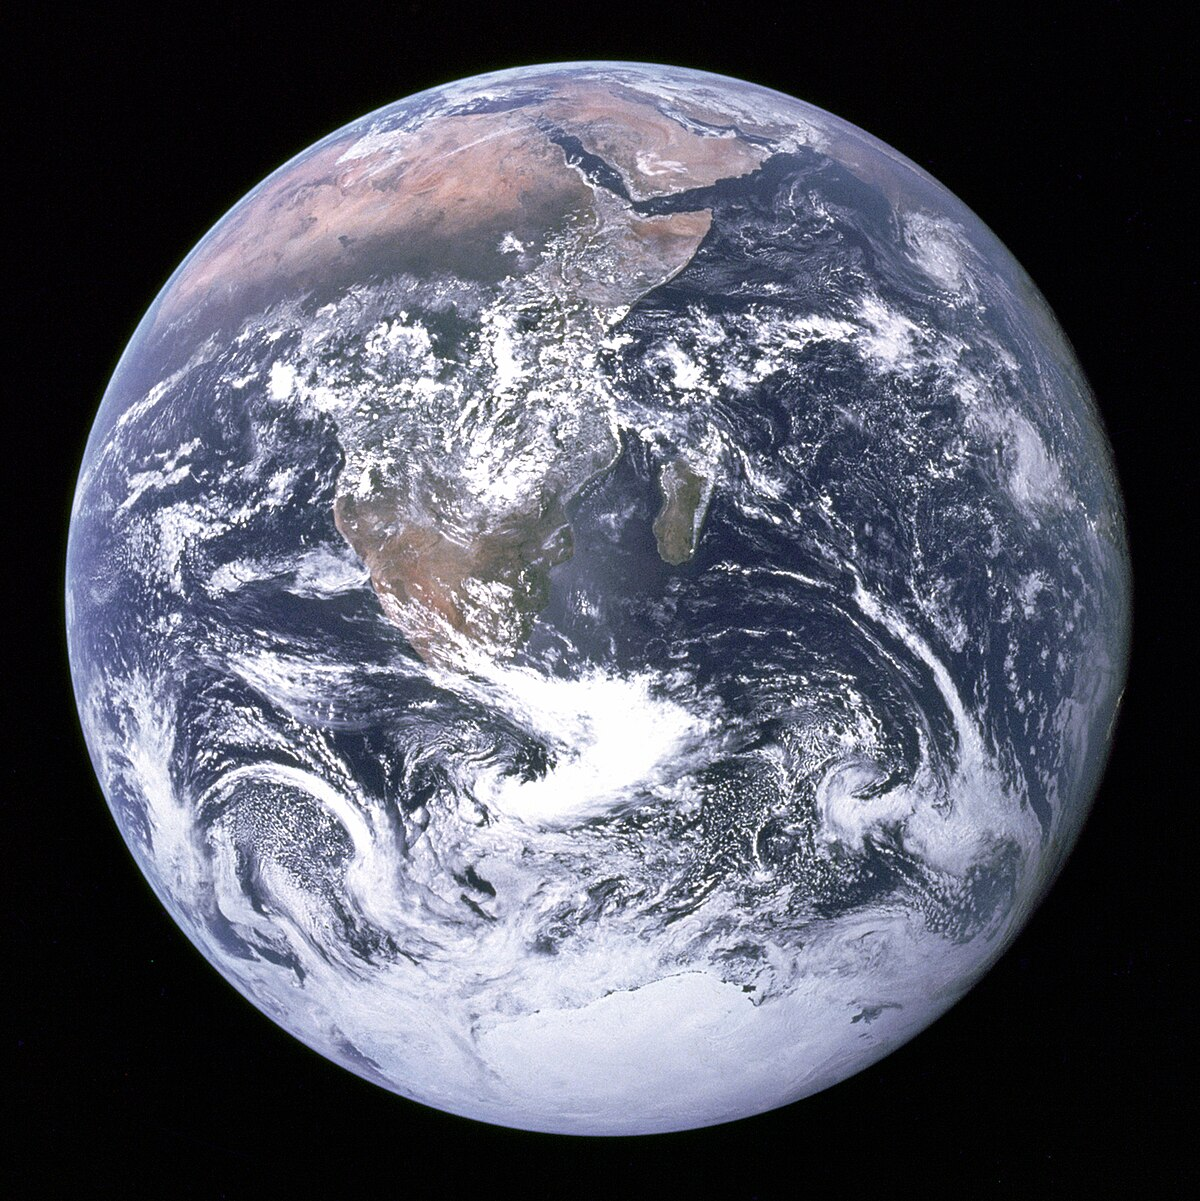

In [ ]:
import requests
from IPython.display import Image

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg"
content = requests.get(image_url).content
Image(content,width=300)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image and who lives there? (return your answer as JSON)",
        },  # You can optionally provide text parts
        {
            "type": "image_url",
            "image_url": image_url
         },
    ]
)

llm.invoke([message])

AIMessage(content=' ```json\n{\n  "image": "Earth",\n  "inhabitedBy": "humans, animals, plants"\n}\n```')